In [211]:
from cmath import nan
import csv
import pandas as pd
import numpy as np
import math
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

def read_csv(path, delimiter):
    if(delimiter == ""):
        df = pd.read_csv(path)
    else:
        df = pd.read_csv(path, delimiter = delimiter)
    return df

def write_csv(path, df):
    df.to_csv(path, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')



In [212]:
#Read, change text format, save new file
df = read_csv('new_data/bank.csv', "")
df.columns = df.columns.str.replace('age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"', ('age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"').replace('"',''))
df = df.applymap(lambda x: x.replace('"',''))
write_csv('processed_data/bank.csv', df)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24996\1262865427.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"', ('age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"').replace('"',''))


In [213]:
#Read and observe data
df = read_csv('processed_data/bank.csv', ";")
print("Dataframe columns: ")
print(df.columns)
print("Dataframe describe: ")
print(df.describe())

Dataframe columns: 
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Dataframe describe: 
               age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000  

In [214]:
# Drop columns
df = df[['job','marital', 'education', 'default', 'loan', 'duration', 'cons.price.idx', 'y']]
print("Dataframe columns after drop: ")
print(df.columns)

Dataframe columns after drop: 
Index(['job', 'marital', 'education', 'default', 'loan', 'duration',
       'cons.price.idx', 'y'],
      dtype='object')


In [215]:
# Observe and preprocess data
df['duration'] = df['duration'].apply(lambda x: str(int(x)))
df['cons.price.idx'] = df['cons.price.idx'].apply(lambda x: str(x))
for it in df.columns:
    print( "-" + it + "-")
    if(len(df[it].unique()) < 5):
        print("This column doesn't that much unique value, no need to replace") 
        print()
        continue
    frequency = df[it].value_counts()
    max = frequency.idxmax()
    min = frequency.idxmin()
    print(frequency)
    print(frequency.min())
    print(frequency.idxmin())
    print(frequency.max())
    print(frequency.idxmax())
    if(df[it].iloc[0].isdigit() or df[it].iloc[0].replace('.','',1).isdigit()):
        print("This column is digit")
        print()
        continue
    df[it] = df[it].apply(lambda x: max if x == min else x)
    frequency = df[it].value_counts()
    print()
    print("--" + it + "--" + " After: ")
    print(frequency)
    print(frequency.min())
    print(frequency.idxmin())
    print(frequency.max())
    print(frequency.idxmax())
    print()

df['y'] = df['y'].apply(lambda x: nan if x == "unknown" else x)
df['y'].dropna()
df['education'] = df['education'].apply(lambda x: nan if x == "unknown" else x)
df['education'].dropna()

-job-
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64
39
unknown
1012
admin.

--job-- After: 
admin.           1051
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
Name: job, dtype: int64
82
student
1051
admin.

-marital-
This column doesn't that much unique value, no need to replace

-education-
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64
1
illiterate
1264
university.degree


0                basic.9y
1             high.school
2             high.school
3                basic.9y
4       university.degree
              ...        
4114             basic.6y
4115          high.school
4116          high.school
4117          high.school
4118          high.school
Name: education, Length: 3952, dtype: object

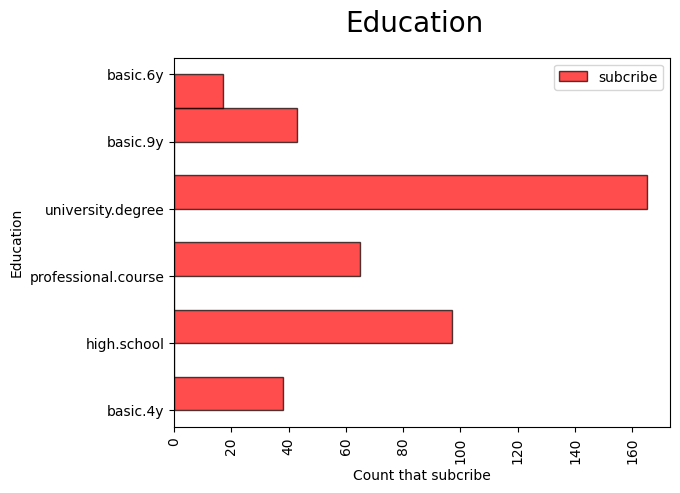

In [216]:
# education vs subcribe
plt.figure()
plt.suptitle('Education', fontsize=20)
plt.hist(df[df['y'] == 'yes'].education.dropna() , alpha = 0.7, label = 'subcribe', color='red', edgecolor = 'black',orientation=u'horizontal')
plt.xticks(rotation=90)
plt.xlabel('Count that subcribe')
plt.ylabel('Education')
plt.legend()

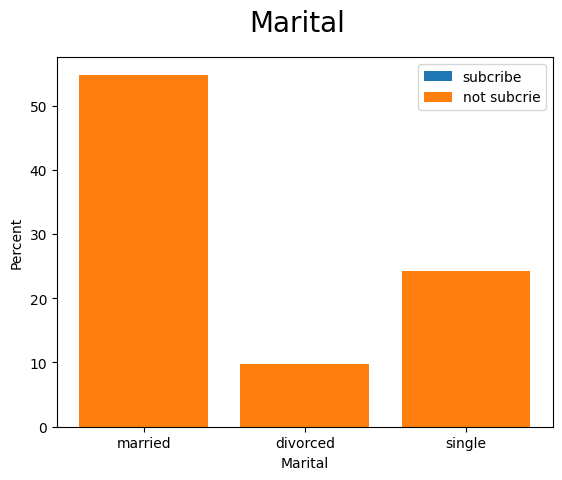

In [217]:
# Marital vs subcribe

plt.figure()
plt.suptitle('Marital', fontsize=20)
X_tickx = ['married', 'divorced', 'single']
Y_subcribe = []
Y_not_subcribe = []
for it in X_tickx:
    df_marital = df[df['marital'] == it]
    Y_subcribe.append(len(df_marital[df_marital['y'] == 'yes']) / len(df) * 100)
    Y_not_subcribe.append(len(df_marital[df_marital['y'] == 'no']) / len(df) * 100)

plt.bar([x for x in range(len(X_tickx))],Y_subcribe, label = 'subcribe')
plt.bar([x for x in range(len(X_tickx))],Y_not_subcribe, label = 'not subcrie')
plt.xticks([x for x in range(len(X_tickx))], X_tickx)
plt.xlabel('Marital')
plt.ylabel('Percent')
plt.legend()

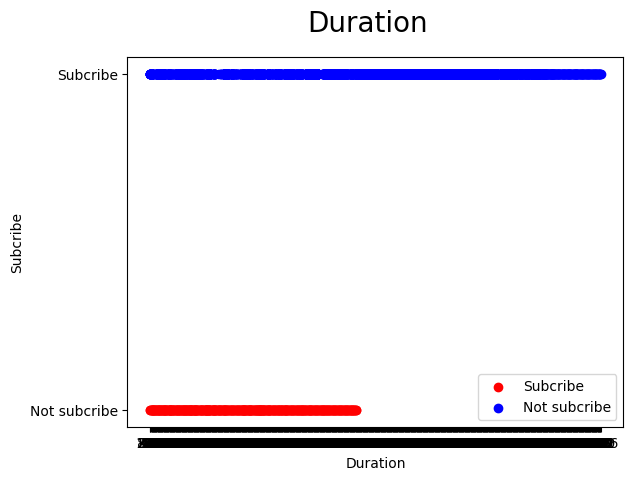

In [218]:
# Duration vs subcribe

dict = {'yes':1, 'no':0}

for row in [df]:
    row['y'] = row['y'].map(dict)

df_duration_subcribe = df[df['y'] == 1].duration
df_duration_not_subcribe = df[df['y'] == 0].duration

plt.figure()
plt.suptitle('Duration', fontsize=20)
plt.scatter(df_duration_subcribe, [0 for x in range(len(df_duration_subcribe))], color = 'red', label = 'Subcribe')
plt.scatter(df_duration_not_subcribe, [1 for x in range(len(df_duration_not_subcribe))], color = 'blue', label = 'Not subcribe')
plt.yticks([0, 1], ["Not subcribe", "Subcribe"])
plt.xlabel('Duration')
plt.ylabel('Subcribe')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x1 [50, 25, 6, 6, 10, 15, 23, 16, 5, 295] 10
x2 [1935, 334, 42, 107, 93, 113, 180, 102, 60, 702] 10
df_percent [0.025839793281653745, 0.0748502994011976, 0.14285714285714285, 0.056074766355140186, 0.10752688172043011, 0.13274336283185842, 0.12777777777777777, 0.1568627450980392, 0.08333333333333333, 0.4202279202279202] 10
df_duration [173.12590799031477 208.2590799031477 213.43341404358353
 225.86198547215497 238.8135593220339 254.67070217917674
 286.23728813559325 311.05326876513317 323.9636803874092
 352.23002421307507] 10


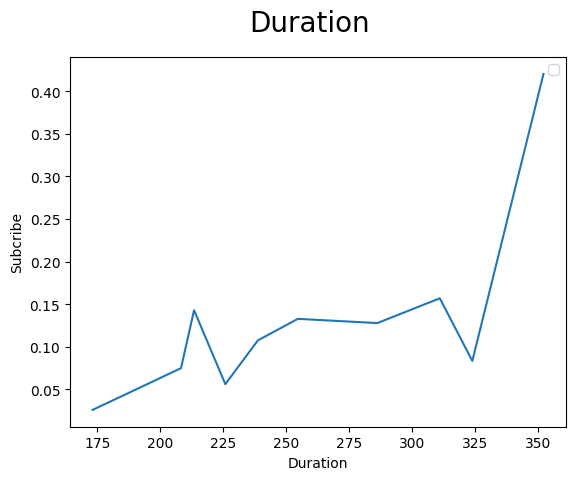

In [219]:
# duration vs subcribe 

def min(a, b):
    if(a > b):
        return b
    return a

def binning(number_of_batch, df, column_name):
    binning_num = 10
    binning_batch = int(math.ceil((len(df) / binning_num))) + 1
    df= df.sort_values(column_name)
    for id1 in range(binning_num):
        mean = 0
        max_length = len(df) - 1 
        for id2 in range(binning_batch):
            id3 = min(max_length, id1 * binning_batch + id2)
            mean += int(df[column_name].iloc[id3])
        mean = mean / binning_batch
        for id2 in range(binning_batch):
            id3 = min(max_length, id1 * binning_batch + id2)
            df[column_name].iloc[id3] = mean
    return df[column_name].unique()

# get each type of subcribe
df_duration = df['duration'].to_frame()
df_duration_subcribe = df[df['y'] == 1].duration.to_frame()
df_duration_not_subcribe = df[df['y'] == 0].duration.to_frame()
df_duration_not_subcribe = df_duration_not_subcribe.applymap(lambda x: float(x))
df_duration_subcribe = df_duration_subcribe.applymap(lambda x: float(x))
df_duration_subcribe = df_duration_subcribe.sort_values('duration')
df_duration_not_subcribe = df_duration_not_subcribe.sort_values('duration')

# arrange duration to 10 group
df_duration = binning(10, df_duration, 'duration')
df_duration.sort()

i = 0
x1 = [0 for x in range(10)]
for idx in range(len(df_duration_subcribe)):
    while(float(df_duration[i]) < float(df_duration_subcribe.iloc[idx]['duration'])):
        i += 1
        if(i == len(df_duration)):
            i -= 1
            break
    x1[i] += 1

i = 0
x2 = [0 for x in range(10)]
for idx in range(len(df_duration_not_subcribe)):
    while(float(df_duration[i]) < float(df_duration_not_subcribe.iloc[idx]['duration'])):
        i += 1
        if(i == len(df_duration)):
            i -= 1
            break
    x2[i] += 1



df_duration_subcribe_percent = [x1[i] / x2[i] if x2[i] != 0 else 1 for i in range(len(df_duration)) ]

print("x1", x1, len(x1))
print("x2", x2, len(x2))
print("df_percent", df_duration_subcribe_percent, len(df_duration_subcribe_percent))
print("df_duration", df_duration, len(df_duration))
plt.figure()
plt.suptitle('Duration', fontsize=20)
plt.plot(df_duration, df_duration_subcribe_percent)
plt.xlabel('Duration')
plt.ylabel('Subcribe')
plt.legend()




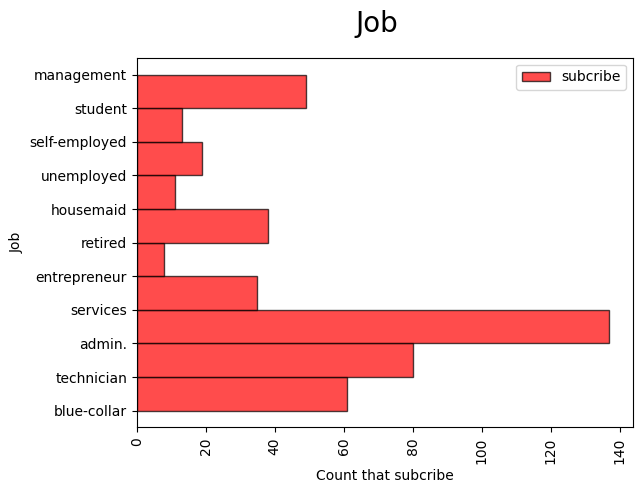

In [221]:
# education vs subcribe
plt.figure()
plt.suptitle('Job', fontsize=20)
plt.hist(df[df['y'] == 1].job.dropna() , alpha = 0.7, label = 'subcribe', color='red', edgecolor = 'black',orientation=u'horizontal')
plt.xticks(rotation=90)
plt.xlabel('Count that subcribe')
plt.ylabel('Job')
plt.legend()